# Fashion MNIST,loading data and transforming it

In [29]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (val_images, val_labels) = mnist.load_data()

training_images=training_images / 255.0
val_images=val_images / 255.0

The first image is
of class 9


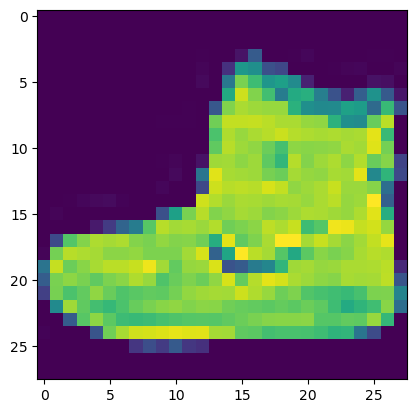

In [31]:
import matplotlib.pyplot as plt
print("The first image is")
plt.imshow(training_images[0])

print("of class",training_labels[0])

In [85]:
from sklearn.model_selection import train_test_split
X_train,x_valid,y_train,y_valid=train_test_split(training_images, training_labels,train_size=0.9)

In [281]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3) , activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [282]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 10816)             0         
                                                                 
 dense_21 (Dense)            (None, 32)                346144    
                                                                 
 dense_22 (Dense)            (None, 10)                330       
                                                                 
Total params: 347,114
Trainable params: 347,114
Non-trainable params: 0
________________________________________________

In [283]:
callback=tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.01,restore_best_weights=True)

In [284]:
history=model.fit(X_train, y_train, validation_data=(val_images, val_labels), epochs=20,callbacks=[callback])

Epoch 1/20
1688/1688 [==============================] - 38s 22ms/step - loss: 0.4546 - accuracy: 0.8423 - val_loss: 0.3443 - val_accuracy: 0.8811
Epoch 2/20
1688/1688 [==============================] - 27s 16ms/step - loss: 0.3032 - accuracy: 0.8927 - val_loss: 0.2985 - val_accuracy: 0.8929
Epoch 3/20
1688/1688 [==============================] - 28s 16ms/step - loss: 0.2647 - accuracy: 0.9055 - val_loss: 0.2985 - val_accuracy: 0.8935
Epoch 4/20
1688/1688 [==============================] - 35s 21ms/step - loss: 0.2379 - accuracy: 0.9134 - val_loss: 0.3010 - val_accuracy: 0.8924
Epoch 5/20
1688/1688 [==============================] - 33s 19ms/step - loss: 0.2166 - accuracy: 0.9208 - val_loss: 0.2709 - val_accuracy: 0.9033
Epoch 6/20
1688/1688 [==============================] - 32s 19ms/step - loss: 0.1951 - accuracy: 0.9285 - val_loss: 0.2696 - val_accuracy: 0.9063
Epoch 7/20
1688/1688 [==============================] - 34s 20ms/step - loss: 0.1771 - accuracy: 0.9359 - val_loss: 0.2986 -

<AxesSubplot:>

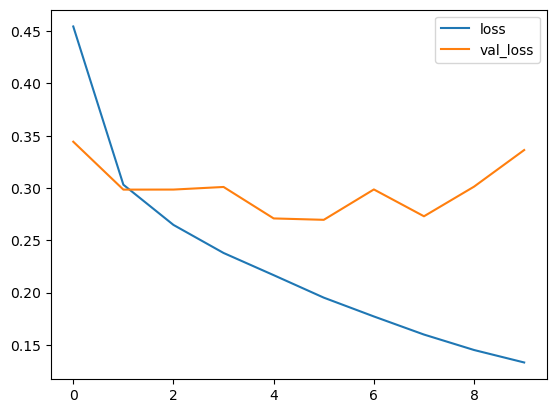

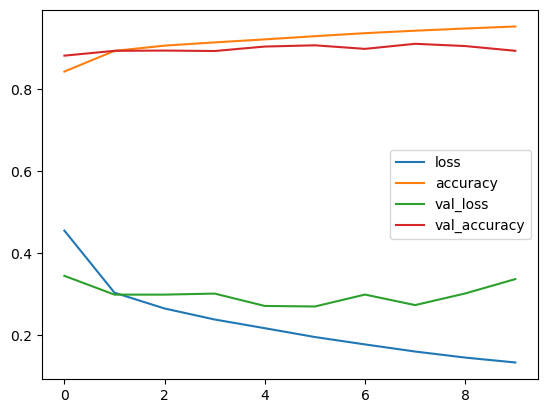

In [285]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.DataFrame(history.history)
df[['loss','val_loss']].plot()
df.plot()

In [286]:
print("The Filter values for The CNN are;-")
arr=model.get_weights()
print(arr[0][0][0][0])

The Filter values for The CNN are;-
[ 0.10581041 -0.0587081   0.24660072 -0.02716835  0.47643977 -0.24976905
 -0.30031347  0.40911064  0.04775826 -0.14136691 -0.08819406  0.15777668
 -0.28438386 -0.16801637  0.17844881  0.37731788  0.02596144 -0.15619683
 -0.14601444  0.01233212  0.020657   -0.16098417  0.02202404 -0.00845317
 -0.05570699  0.17483887  0.13675645 -0.12485469  0.2830309   0.1759554
 -0.2002471  -0.21178477 -0.07039261 -0.01863088 -0.1592012   0.15950765
 -0.1919673   0.21068005  0.00829916 -0.17681497 -0.06657811  0.05512445
 -0.16486727  0.13757887 -0.01345529  0.22526792  0.13858642 -0.01430371
  0.17071202 -0.08790324 -0.37386918  0.02055329 -1.0009309  -0.1513519
 -0.07291467  0.02663676  0.09722563 -0.26102334  0.04483406 -0.11216535
 -0.01322767 -0.26368648 -0.28836992  0.04036418]


In [287]:
#defining a dictionary of clothing items
dict={0:'T-shirt/top',
1: 'Trouser.',
2: 'Pullover.',
3: 'Dress.',
4: 'Coat.',
5: 'Sandal.',
6: 'Shirt.',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot'}

1/1 [==============================] - 0s 15ms/step
prediction- Coat.
actual category- Coat.


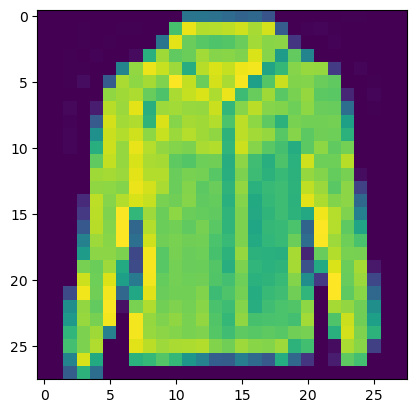

In [365]:
import random
a=random.randint(0,len(x_valid))
arr=model.predict(x_valid[a].reshape(1,28,28))
plt.imshow(x_valid[a])
print('prediction-',dict.get(np.argmax(arr)))
print('actual category-',dict.get(y_valid[a]))

Predicting an Image from the online using url

1/1 [==============================] - 0s 28ms/step


'Coat.'

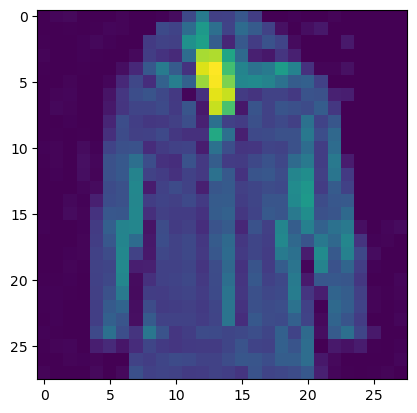

In [298]:
import numpy as np
import requests
from PIL import Image as im
url='https://datasets-server.huggingface.co/assets/fashion_mnist/--/fashion_mnist/train/19/image/image.jpg'
response=requests.get(url,stream=True)
img0=im.open(response.raw)
plt.imshow(img0)
img = np.array(img0)/255.0
dict.get(np.argmax(model.predict(img.reshape(1,28,28))))